<a href="https://colab.research.google.com/github/MichelWars/exercicios-de-aulas/blob/main/AulaIA10_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

Matriz de Confusão:
 [[ 452   41  294]
 [  21 2067  328]
 [ 151  417 1329]]


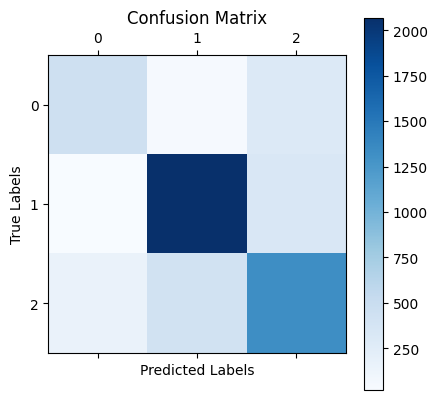

In [ ]:
data = pd.read_csv("sample_data/california_housing_train.csv")

X = data.drop("median_house_value", axis=1)
y = data["median_house_value"]

y = pd.cut(y, bins=3, labels=['baixo', 'médio', 'alto'])


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

knn_cls = KNeighborsClassifier(n_neighbors=5)


knn_cls.fit(X_train, y_train)


y_pred = knn_cls.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted', zero_division='warn')
recall = recall_score(y_val, y_pred, average='weighted', zero_division='warn')
f1 = f1_score(y_val, y_pred, average='weighted', zero_division='warn')


cm = confusion_matrix(y_val, y_pred)
print("Matriz de Confusão:\n", cm)


plt.matshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

